In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from matplotlib import cm

# 100 files seen


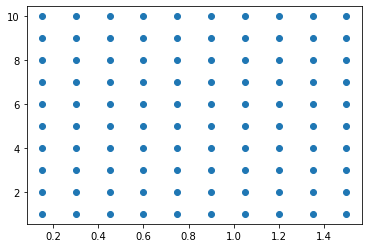

In [4]:
fdir = './gmid_test'
flist =  []
lwlist = []
for fname in os.listdir(fdir):
    if fname.startswith('data'):
        flist.append(fname)
        parts = fname[:-4].split('_') # Strip .raw extension
        if len(parts) != 3:
            print('Warning: malformed file name: ', fname)
        L = float(parts[1][1:])
        W = float(parts[2][1:])
        lwlist.append((L,W))
        
# This scatter plot is meant for the user to spot unsupported device sizes
plt.scatter(*zip(*lwlist));
fcount = len(flist) 
print('#',fcount,'files seen')

In [6]:
vgs_list_all = []
cgb_list_all = []
cgd_list_all = []
cgs_list_all = []
gds_list_all = []
gm_list_all  = []
id_list_all  = []
vth_list_all = []


for fname in flist:
    # Read File
    # fname = './data_nfet_01v8_aM01_W1p00L0p15NF1.raw'
    f = open(fdir+'/'+fname,'r')
    lines = f.readlines()
    f.close()
    
    # Count Lines
    count = 0
    for line in lines:
        count = count + 1
        if line.startswith('Values'):
            break
    # print('Record starting at: ', count)
    lines_1 = lines[count:]
    
    # Populate List
    vgs_list = []
    cgb_list = []
    cgd_list = []
    cgs_list = []
    gds_list = []
    gm_list  = []
    id_list  = []
    vth_list = []
    count = 0
    for line in lines_1:
        line = line[:-1].split('\t')
        if(len(line)>1):
            if(line[0]!=''):
                count = 0
                # print(line[0])
                value = float(line[1])
                
            elif line[1]!='' :
                count = count + 1
                value = float(line[1])
                
            if count == 0:
                vgs_list.append(value)
            elif count == 1:
                cgb_list.append(value)
            elif count == 2:
                cgd_list.append(value)
            elif count == 3:
                cgs_list.append(value)
            elif count == 4:
                gds_list.append(value)
            elif count == 5:
                gm_list.append(value)
            elif count == 6:
                id_list.append(value)
            elif count == 7:
                vth_list.append(value)
            else:
                print('WTF')
                
    # Populate top-level list
    vgs_list_all.append(vgs_list)
    cgb_list_all.append(cgb_list)
    cgd_list_all.append(cgd_list)
    cgs_list_all.append(cgs_list)
    gds_list_all.append(gds_list)
    gm_list_all. append(gm_list)
    id_list_all. append(id_list)
    vth_list_all.append(vth_list)
# Convert to np.array

vgs_list_all = np.array(vgs_list_all)
cgb_list_all = np.array(cgb_list_all)
cgd_list_all = np.array(cgd_list_all)
cgs_list_all = np.array(cgs_list_all)
gds_list_all = np.array(gds_list_all)
gm_list_all  = np.array(gm_list_all)
id_list_all  = np.array(id_list_all)
vth_list_all = np.array(vth_list_all)

at 9 L 0.6 W 6.0 chosen
at 29 L 0.6 W 1.0 chosen
at 30 L 0.6 W 9.0 chosen
at 31 L 0.6 W 3.0 chosen
at 44 L 0.6 W 4.0 chosen
at 54 L 0.6 W 5.0 chosen
at 61 L 0.6 W 8.0 chosen
at 69 L 0.6 W 10.0 chosen
at 89 L 0.6 W 7.0 chosen
at 96 L 0.6 W 2.0 chosen


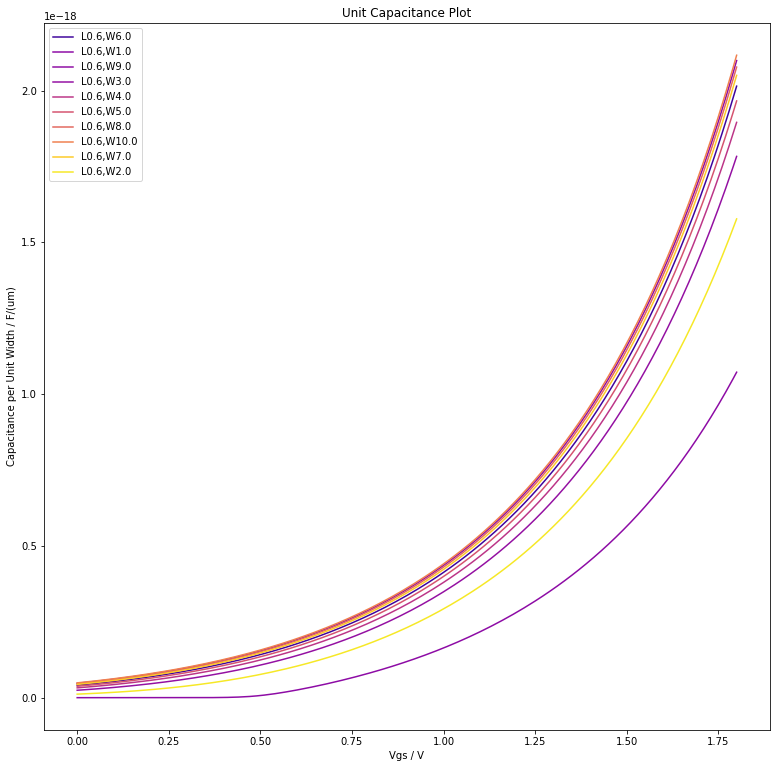

In [41]:
plot_sel = 0

# 0: Capacitance
# 1: gm/id vs. current density (id/w)
# 2: gm/id vs. intrinsic gain (gm/gds)
# 3: fT vs. vgs
# 4: gm/w vs. vgs
plt.cla()
legends = []
plt.rcParams['figure.figsize'] = [13, 13]
cmap = cm.get_cmap('plasma')

lw = []
l1 = []

for i in range(len(lwlist)):
    color = cmap(i/len(lwlist))
    # Reduce the number of plots
    lwt = lwlist[i]
    L = lwt[0]
    W = lwt[1]
    # if (L%0.15<0.01) and (W%4<0.1):
    if L==0.6:
        print('at',i,'L',L,'W',W,'chosen')
        # Div by 8
        vgs_list = vgs_list_all[i,:]
        cgb_list = cgb_list_all[i,:]
        cgd_list = cgd_list_all[i,:]
        cgs_list = cgs_list_all[i,:]
        gds_list = gds_list_all[i,:]
        gm_list  = gm_list_all [i,:]
        id_list  = id_list_all [i,:]
        vth_list = vth_list_all[i,:]
        legends.append('L{},W{}'.format(L,W))
        
        if plot_sel==0:
            # plt.plot(vgs_list, -np.array(cgs_list)/W,color=color)
            plt.plot(vgs_list, -np.array(cgd_list)/W,color=color)
            # plt.plot(vgs_list, -np.array(cgb_list)/W,color=color)
        elif plot_sel==1:
            plt.semilogy(np.array(gm_list)/np.array(id_list),np.array(id_list)/W,color=color)
        elif plot_sel==2:
            plt.plot(np.array(gm_list)/np.array(id_list),np.array(gm_list)/np.array(gds_list),color=color)
        elif plot_sel==3:
            # fT
            plt.plot(vgs_list, -gm_list/(2*np.pi*(cgs_list+cgd_list))/1e9, color=color)
        elif plot_sel==4:
            plt.plot(vgs_list,gm_list/W, color=color)
        elif plot_sel==5:
            plt.plot(vgs_list,id_list,color=color)
            
            # I hate floating point numbers
            for i in range(len(vgs_list)):
                if abs(vgs_list[i]-1.2)<0.001:
                    lw.append(W)
                    l1.append(id_list[i])
        
        else: 
            print('Unknown Plot Type')
        # plt.plot(vgs_list,np.array(gm_list)/np.array(gds_list))
        # plt.plot(vgs_list,id_list)
plt.legend(legends)

if plot_sel==0:
    plt.xlabel('Vgs / V')
    plt.ylabel('Capacitance per Unit Width / F/(um)')
    plt.title('Unit Capacitance Plot')
elif plot_sel==1:
    plt.ylabel('Current Density (Ids/W) / A/um')
    plt.xlabel('Inversion Factor (gm/Ids)')
    plt.title('Current Density vs Inversion Factor')
elif plot_sel==2:
    plt.ylabel('Intrinsic Gain (gm/gds) / 1')
    plt.xlabel('Inversion Factor (gm/Ids)')    
    plt.title('Intrinsic Gain vs Inversion Factor')
elif plot_sel==3:
    plt.xlabel('Vgs / V')
    plt.ylabel('Transition Frequency / GHz')
    plt.title('Theoretical fT')
    
elif plot_sel==4:
    plt.xlabel('Vgs / V')
    plt.ylabel('gm/W')
# plt.plot(vgs_list,np.array(gm_list)/np.array(gds_list))
# plt.title('Intrinsic Gain Plot of nfet, L=0.15, W=1.00, NF=1')
# plt.xlabel('Vgs/V')
# plt.ylabel('Intrisic Gain')

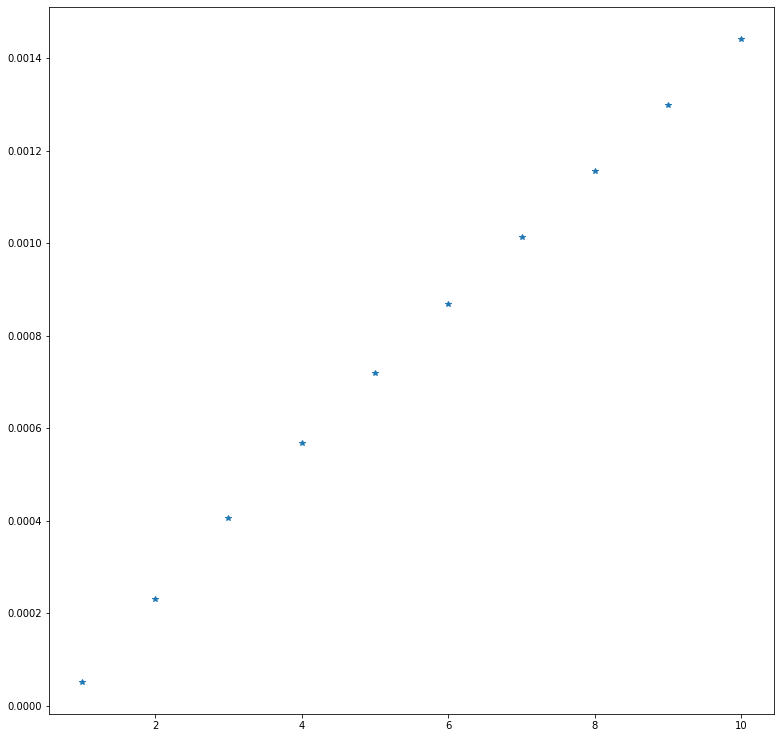

In [37]:
plt.plot(lw,l1,'*')


In [26]:
for i in range(len(vgs_list)):
    if (abs(vgs_list[i]-1.2)<0.001):
        print(i)

120


### Degenerated Common-Source LNA Input Impedance

$$Z_{in}=s\cdot(L_g+L_s)+\frac{1}{s\cdot C_{gs}}+gm\cdot\frac{L_s}{C_{gs}}$$

Velosity saturation happens at ~ 1.2V bias

Cgs is approximately 3fF/um at L=0.6, Choose W=10um
gm is ~ 0.004 at L=0.6, W~10um, Vgs = 1.2V

-> Ls  = 375pH
-> Ids = 1.4mA

In [31]:
50*30e-15/0.004

3.7499999999999995e-10

Text(0, 0.5, 'Caps/F')

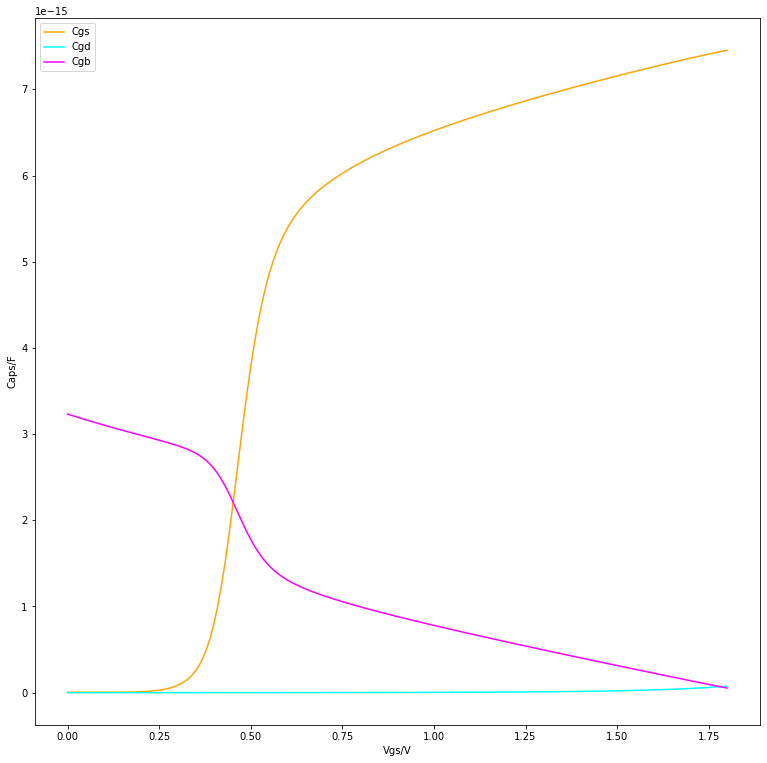

In [5]:
plt.plot(vgs_list, -np.array(cgs_list),'orange')
plt.plot(vgs_list, -np.array(cgd_list),'cyan')# Cgd is shorted?
plt.plot(vgs_list, -np.array(cgb_list),'magenta') 
plt.legend(['Cgs','Cgd','Cgb'])
plt.xlabel('Vgs/V')
plt.ylabel('Caps/F')

$$C_{gs}\approx4\times10^{-16} F$$
$$C_{gb}\approx2.5\times10^{-16} F$$

but hey, we're doing an LNA

Gate Impedance:
$$r_g\approx r_{poly0}\cdot\frac{W}{L}=48200m\Omega\cdot\frac{1.3}{0.6}=104\Omega$$

Well... This is huge, but we have 20 in parallel
$$r_g\approx5\Omega$$

$$f_{max}\approx\frac{1}{4\pi}\cdot\sqrt{\frac{\omega_T}{r_g\cdot C_{gd}}}$$

Let's use $f_T\approx20GHz$, $\omega_T=126Grad/s$
@ L=0.6, W=20, Cgd=(extremely small)

The model is...


$$\omega_{max}=\frac{1}{2}\cdot\sqrt{\frac{gm}{r_g\cdot C_{gd}\cdot(C_{gs}+C_{gd})}}$$